In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('waze_app_dataset.csv', index_col='ID')

The dataset offers a comprehensive insight into user interactions within the Waze navigation app, crucial for understanding and mitigating user churn. Waze, renowned for its free navigation services, fosters a dynamic community of contributors, including map editors, beta testers, and partners, united in the mission to enhance global travel efficiency and safety.

Ideal for both exploratory data analysis (EDA) and machine learning (ML), the dataset enables the development of accurate models to pinpoint factors contributing to churn. These models address critical questions such as who, why, and when users churn, empowering proactive retention strategies.

Note: This dataset has been created for educational purposes.

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
ID,,,,,,,,,,,,
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.5+ MB


Dropping Na values in 'label' column, as we cannot fill them with the available information

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


# Tranforming categorical features into binary Dummy Variables

In [8]:
df=pd.get_dummies(df,dtype=int,drop_first=True) 

# Graphical Analysis

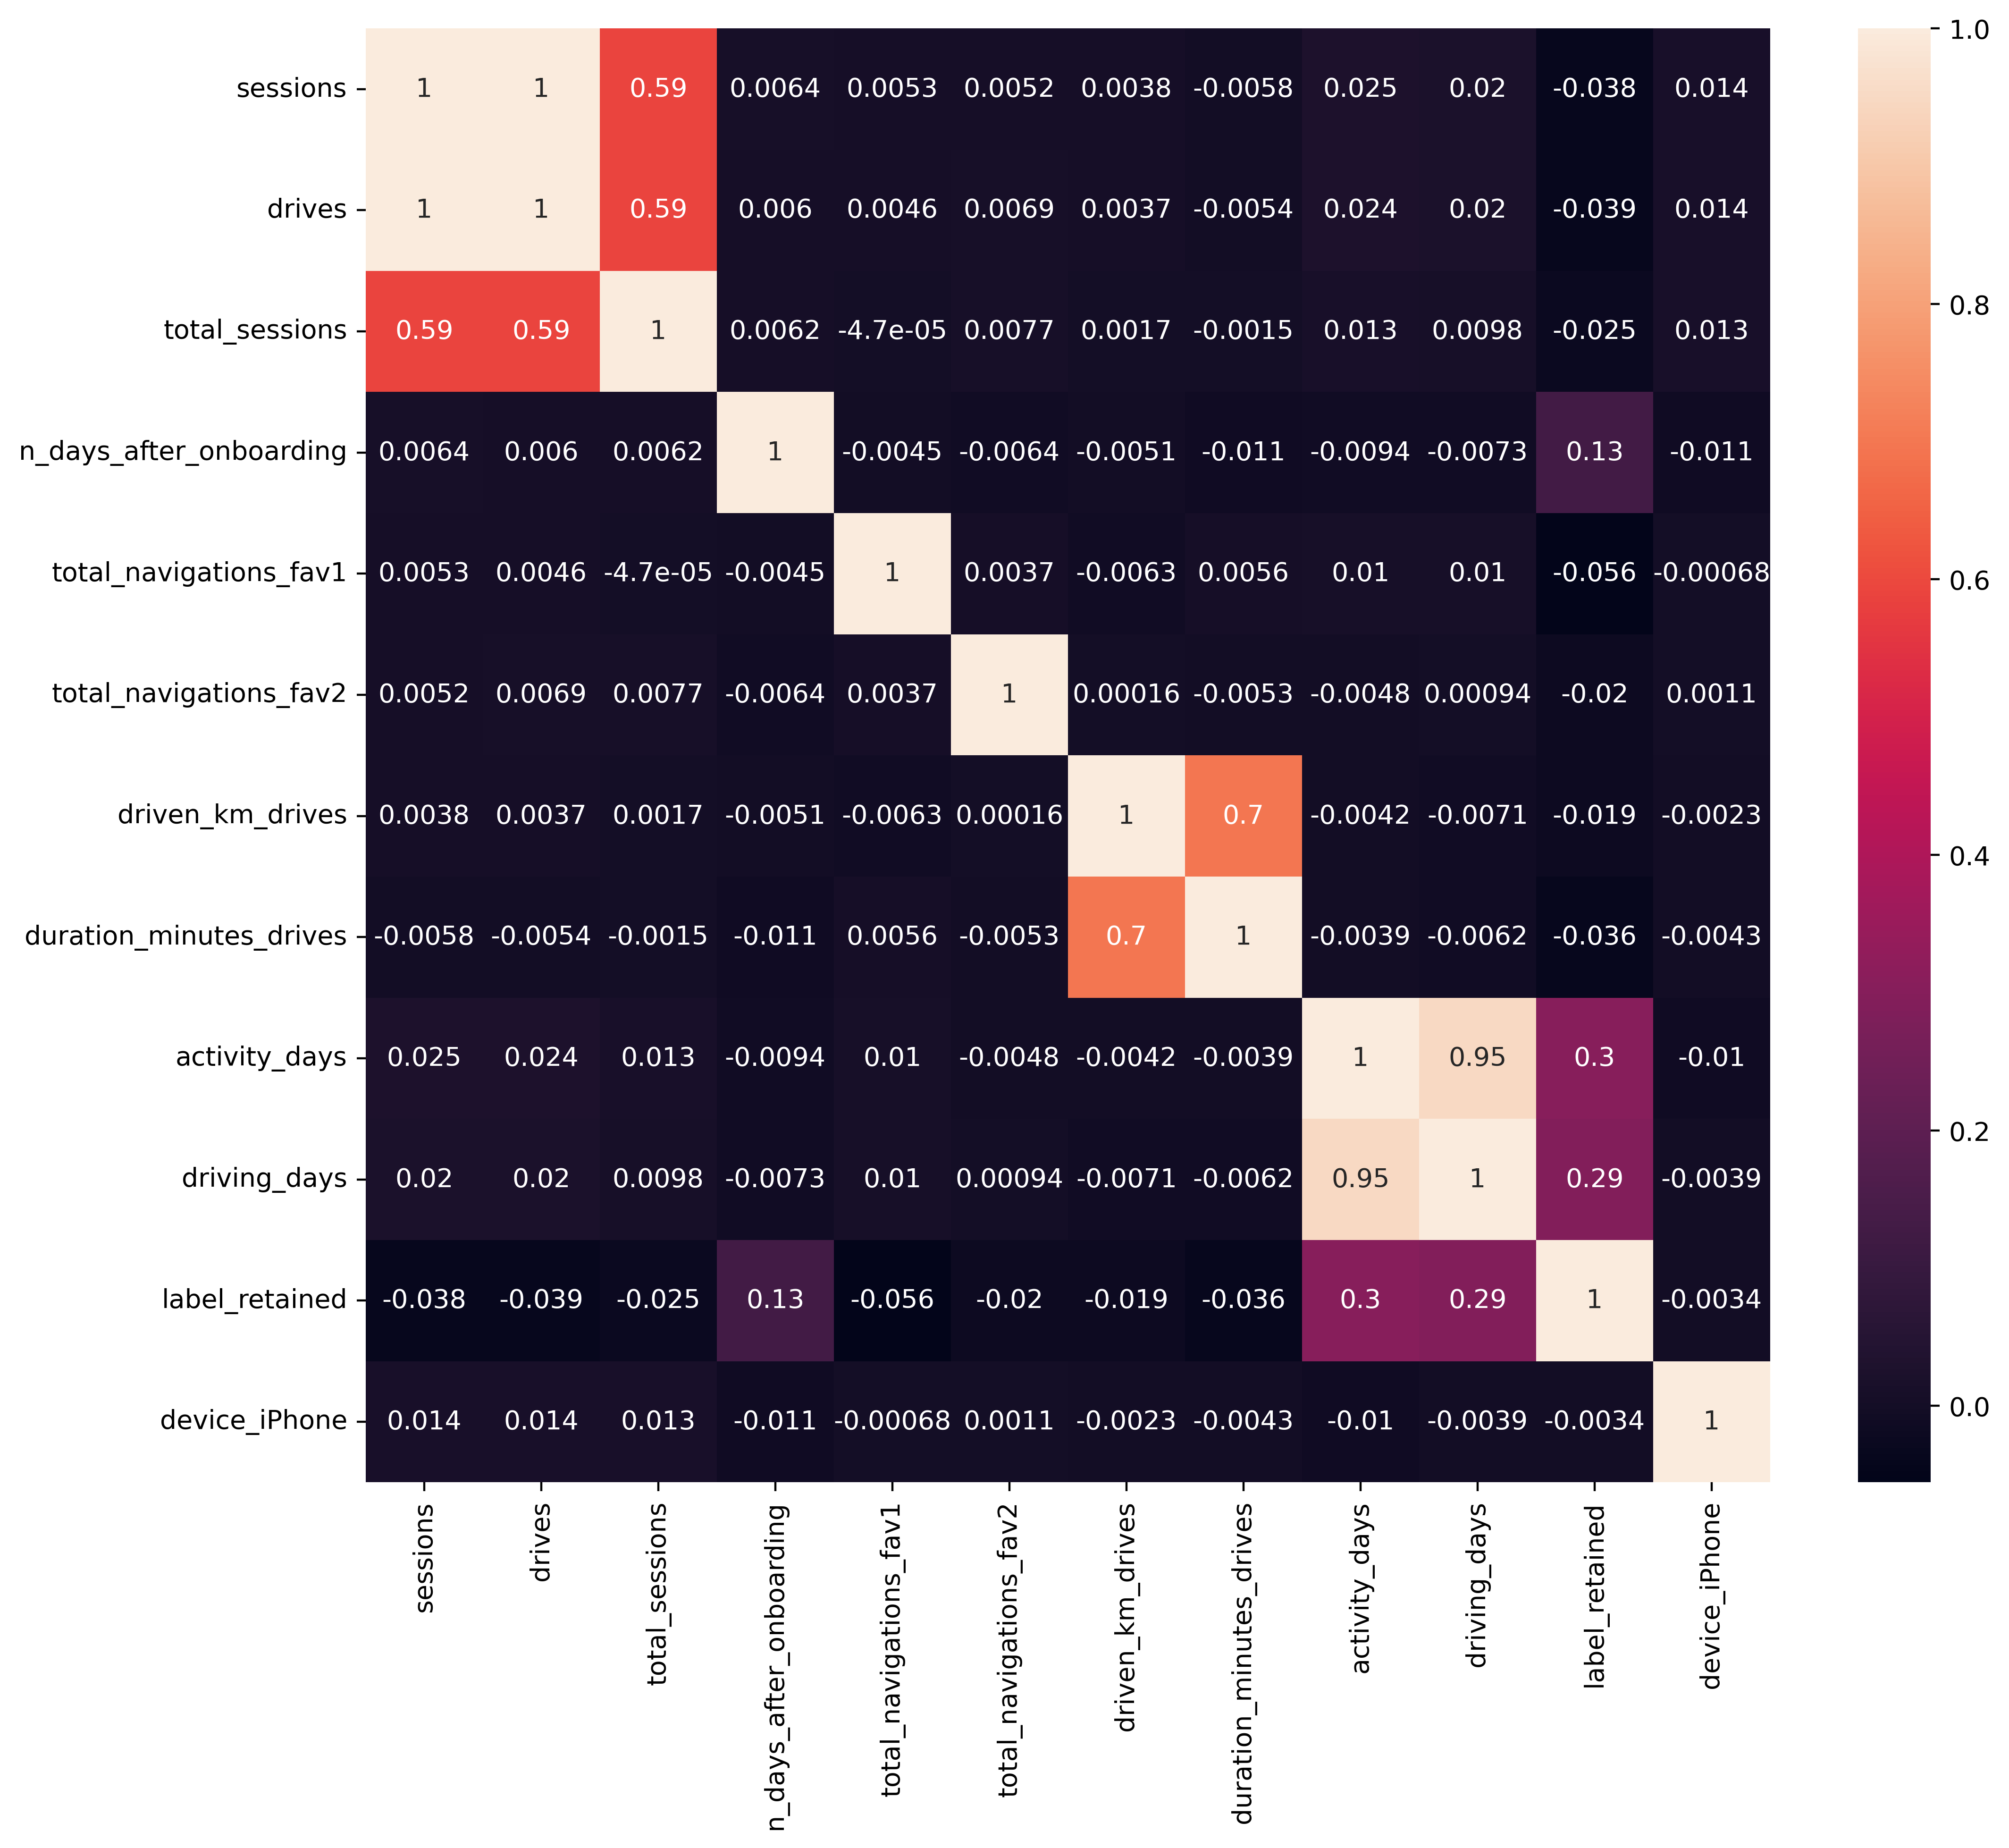

In [9]:
plt.figure(figsize=(12,10),dpi=400)
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='label_retained', ylabel='count'>

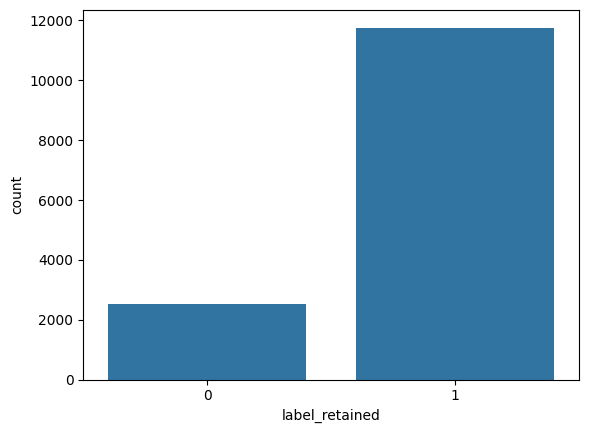

In [10]:
sns.countplot(data=df, x='label_retained') 

Presented potential class imbalance, we will check it later.

<Axes: xlabel='label_retained', ylabel='activity_days'>

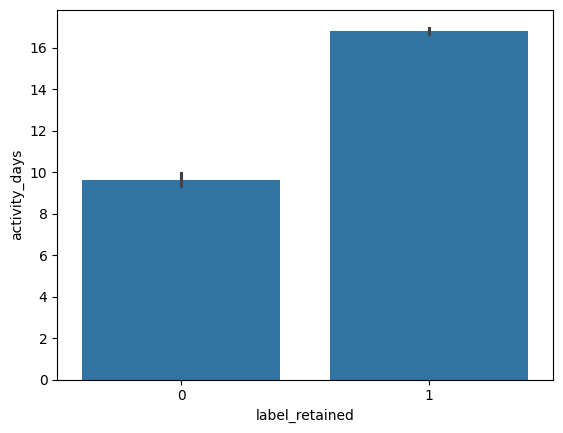

In [11]:
sns.barplot(data=df, x='label_retained', y='activity_days')

<Axes: xlabel='label_retained', ylabel='driving_days'>

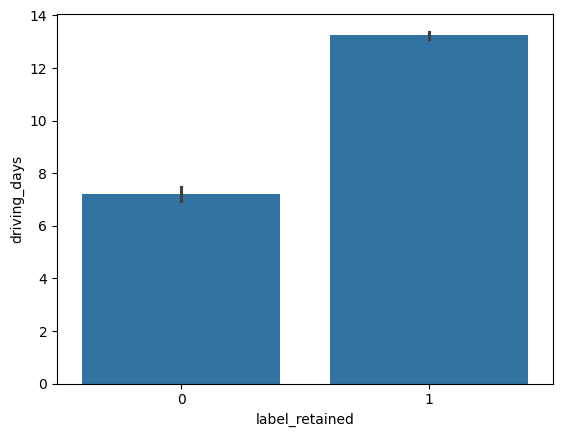

In [12]:
sns.barplot(data=df, x='label_retained', y='driving_days')

<Axes: xlabel='sessions', ylabel='drives'>

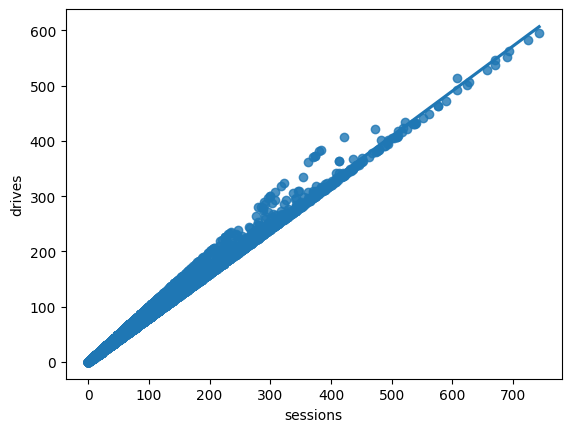

In [13]:
sns.regplot(data=df, x='sessions',y='drives') #We detect a perfect correlation between those labels, so we will drop one of them 

<Axes: xlabel='driving_days', ylabel='activity_days'>

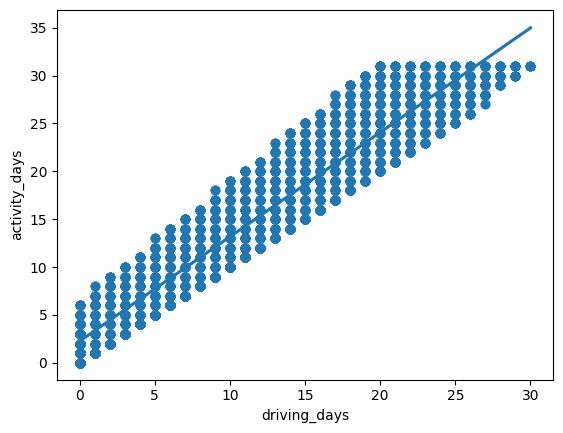

In [14]:
sns.regplot(data=df, x='driving_days',y='activity_days')

We detect from graphs above, we have a very high correlation among some features:
-'sessions' and 'drives' : Perfect correlation: 1.0
-'driving_days' and 'activity_Days': Pretty high correlation: 0.95

We will drop one of each, in this case:'sessions' and 'driving_days' as they can cause multicolliniarity.


In [15]:
df.drop(['sessions','driving_days'], axis=1, inplace=True)

In [16]:
df.columns

Index(['drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'label_retained',
       'device_iPhone'],
      dtype='object')

<Axes: xlabel='total_sessions', ylabel='duration_minutes_drives'>

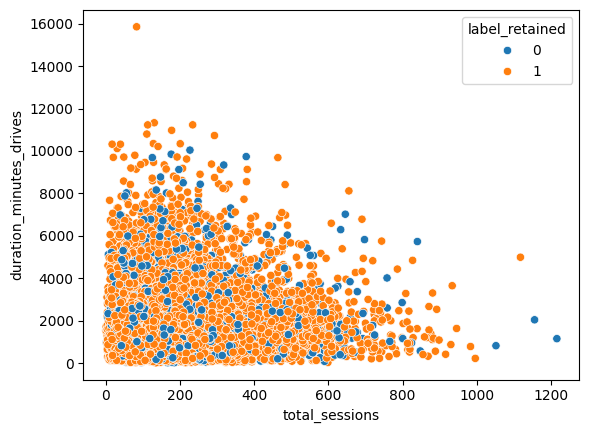

In [17]:
sns.scatterplot(data=df, x='total_sessions',y='duration_minutes_drives', hue='label_retained')

<Axes: xlabel='activity_days', ylabel='driven_km_drives'>

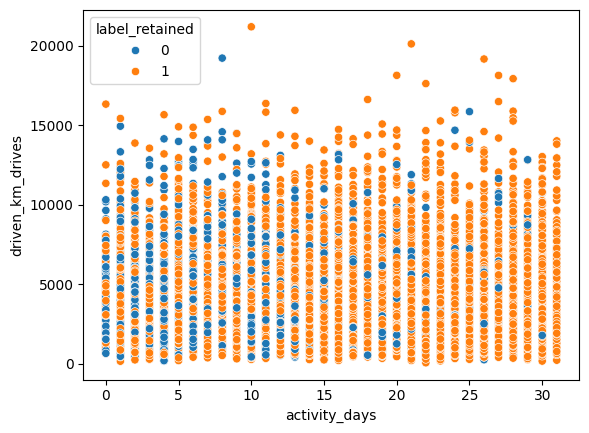

In [18]:
sns.scatterplot(data=df, x='activity_days',y='driven_km_drives', hue='label_retained')

# Features & Label and Train|Test Split

In [19]:
X= df.drop('label_retained',axis=1)

In [20]:
y= df['label_retained']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Scaling features to a Normal Distribution 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)

In [26]:
scaled_X_test = scaler.transform(X_test)

# Testing on different Classification Models

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier()

In [29]:
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()

In [32]:
log.fit(scaled_X_train,y_train)

LogisticRegression()

In [33]:
from sklearn.svm import LinearSVC

In [34]:
svc = LinearSVC()

In [35]:
svc.fit(scaled_X_train,y_train)

C:\Users\afrik\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(scaled_X_train,y_train)

AdaBoostClassifier()

# Performance Evaluation

In [37]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [38]:
def report(model):
    preds = model.predict(scaled_X_test)
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    print(classification_report(y_test, preds))

RFC Model
              precision    recall  f1-score   support

           0       0.47      0.13      0.20       403
           1       0.83      0.97      0.89      1742

    accuracy                           0.81      2145
   macro avg       0.65      0.55      0.55      2145
weighted avg       0.76      0.81      0.76      2145



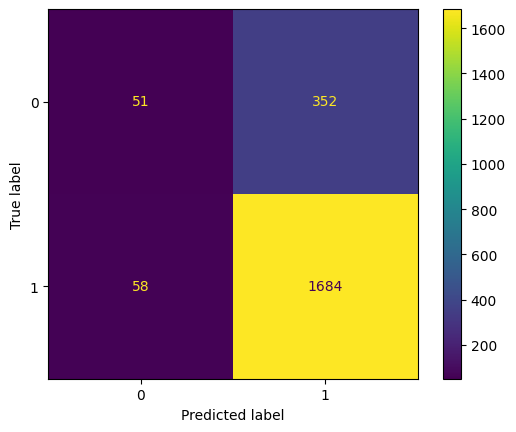

In [39]:
print('RFC Model')
report(rfc)

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.08      0.14       403
           1       0.82      0.99      0.90      1742

    accuracy                           0.82      2145
   macro avg       0.74      0.53      0.52      2145
weighted avg       0.79      0.82      0.76      2145



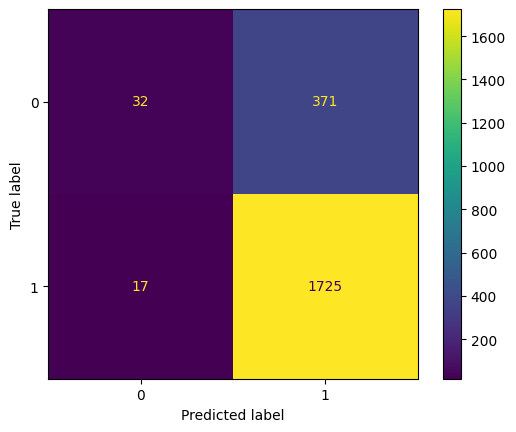

In [40]:
print('Logistic Regression')
report(log)

SVC Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.81      1.00      0.90      1742

    accuracy                           0.81      2145
   macro avg       0.41      0.50      0.45      2145
weighted avg       0.66      0.81      0.73      2145



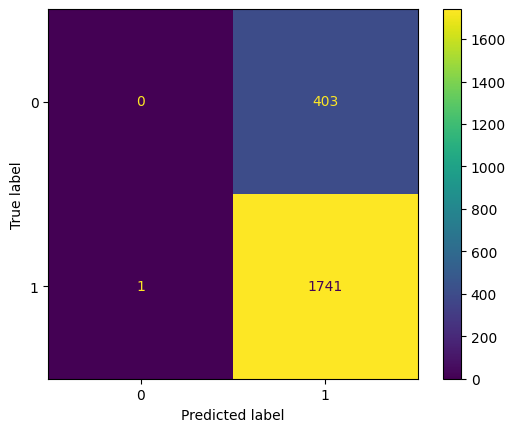

In [41]:
print('SVC Model')
report(svc)

ADA Classifier
              precision    recall  f1-score   support

           0       0.60      0.12      0.21       403
           1       0.83      0.98      0.90      1742

    accuracy                           0.82      2145
   macro avg       0.71      0.55      0.55      2145
weighted avg       0.78      0.82      0.77      2145



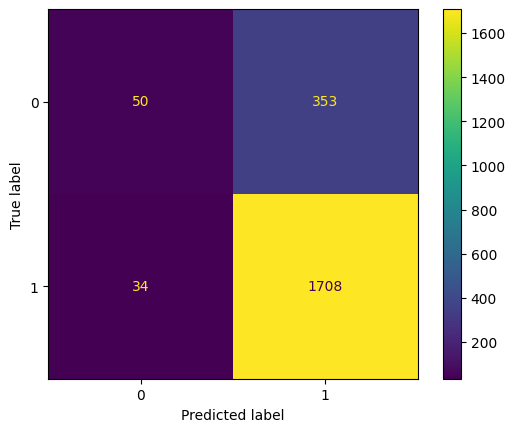

In [42]:
print('ADA Classifier')
report(ada)

The ability to predict 'churned' is very poor.  there is an imbalance class, where we have many retained and less churned.
let's try to balance the minority class in order to predict the false negative better.

# Handling Imbalance Class

In [43]:
n_retained = df[df['label_retained'] == 1]['label_retained'].count()

In [44]:
n_churned = df[df['label_retained'] == 0]['label_retained'].count()

In [45]:
churned_perc = n_churned/len(df)*100
print('Percentage_Churned:',round(churned_perc,2),'%')

Percentage_Churned: 17.74 %


In [46]:
retained_perc = n_retained/len(df)*100
print('Percentage_Retained:', round(retained_perc,2),'%')

Percentage_Retained: 82.26 %


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=28)
X_resampled, y_resampled = smote.fit_resample(scaled_X_train, y_train)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()

In [50]:
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log = LogisticRegression()

In [53]:
log.fit(X_resampled,y_resampled)

LogisticRegression()

In [54]:
from sklearn.svm import LinearSVC

In [55]:
svc = LinearSVC()

In [56]:
svc.fit(X_resampled,y_resampled)

C:\Users\afrik\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_resampled,y_resampled)

AdaBoostClassifier()

RFC Model
              precision    recall  f1-score   support

           0       0.36      0.39      0.38       403
           1       0.86      0.84      0.85      1742

    accuracy                           0.75      2145
   macro avg       0.61      0.62      0.61      2145
weighted avg       0.76      0.75      0.76      2145



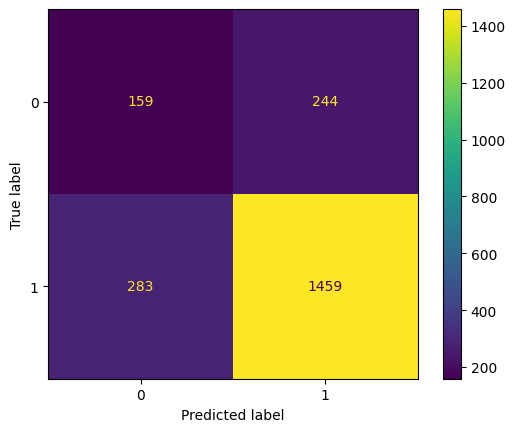

In [58]:
print('RFC Model')
report(rfc)

Logistic Regression
              precision    recall  f1-score   support

           0       0.34      0.74      0.47       403
           1       0.92      0.67      0.78      1742

    accuracy                           0.69      2145
   macro avg       0.63      0.71      0.62      2145
weighted avg       0.81      0.69      0.72      2145



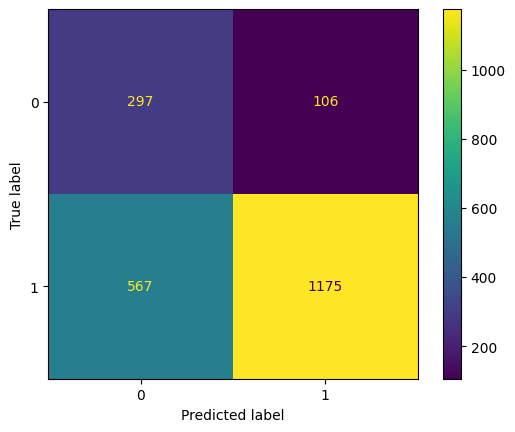

In [59]:
print('Logistic Regression')
report(log)

SVC Model
              precision    recall  f1-score   support

           0       0.34      0.74      0.47       403
           1       0.92      0.67      0.77      1742

    accuracy                           0.68      2145
   macro avg       0.63      0.71      0.62      2145
weighted avg       0.81      0.68      0.72      2145



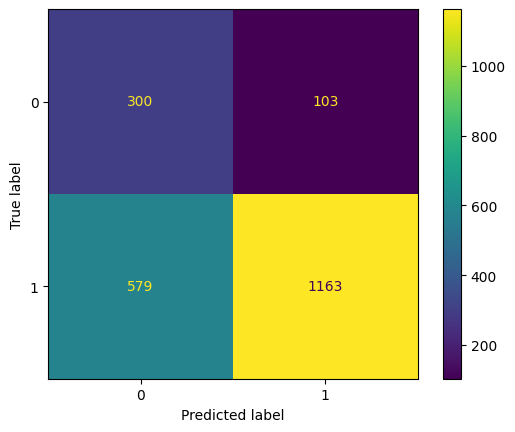

In [60]:
print('SVC Model')
report(svc)

ADA Classifier
              precision    recall  f1-score   support

           0       0.34      0.63      0.44       403
           1       0.89      0.71      0.79      1742

    accuracy                           0.70      2145
   macro avg       0.61      0.67      0.62      2145
weighted avg       0.79      0.70      0.73      2145



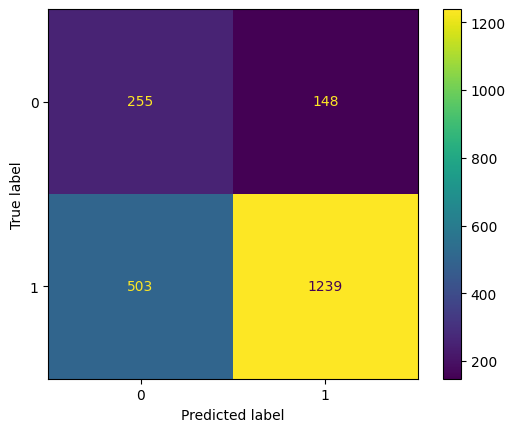

In [61]:
print('ADA Classifier')
report(ada)

In terms of:
-Accuracy: We performed better with Random Forest Classifier, but this model is poor classifying the minority class (low recall)
-Recall: We performed better with Logistic Regression or SVC models, but the accuracy is lower than Random Forest.

Let's perform GridSearchCV to tune hyperparameters for these models and try to select the best.

# GridSearch CV with selected Models.

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the models and hyperparameters
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=28),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [2, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=28),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear']  
        }
    },
    'LinearSVC': {
        'model': LinearSVC(max_iter=10000, random_state=28),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'loss': ['hinge', 'squared_hinge']
        }

Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation accuracy for RandomForestClassifier: 0.7733792952881964

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for LogisticRegression: 0.6929950027607543

Best parameters for LinearSVC: {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best cross-validation accuracy for LinearSVC: 0.6928452648208199



{'RandomForestClassifier': RandomForestClassifier(max_depth=10, n_estimators=150, random_state=28),
 'LogisticRegression': LogisticRegression(C=0.1, max_iter=1000, random_state=28, solver='liblinear'),
 'LinearSVC': LinearSVC(C=0.1, max_iter=10000, random_state=28)}

In [63]:
#Perform GridSearchCV for each model
best_models = {}
best_scores = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")

Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation accuracy for RandomForestClassifier: 0.7733792952881964

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for LogisticRegression: 0.6929950027607543

Best parameters for LinearSVC: {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best cross-validation accuracy for LinearSVC: 0.6928452648208199



In [64]:
# Select the best model based on cross-validation scores
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"Best model: {best_model_name} with cross-validation accuracy: {best_scores[best_model_name]}")

Best model: RandomForestClassifier with cross-validation accuracy: 0.7733792952881964


              precision    recall  f1-score   support

           0       0.35      0.59      0.44       403
           1       0.89      0.74      0.81      1742

    accuracy                           0.71      2145
   macro avg       0.62      0.67      0.62      2145
weighted avg       0.78      0.71      0.74      2145



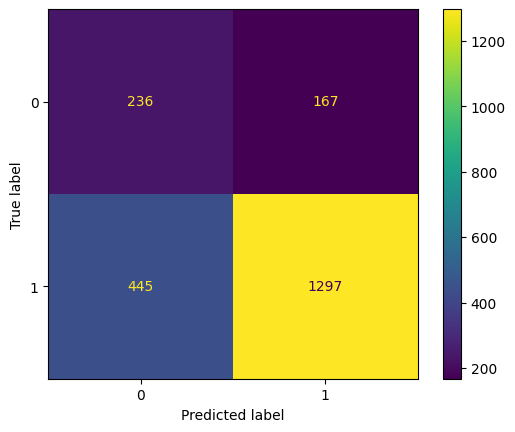

In [66]:
report(best_model)

In [69]:
best_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=10, n_estimators=150, random_state=28)>

We find out that the best model is 'Random Forest Classifier' as has higher accuracy:71% and a decent recall of aroudn 60%

# Training on all data - Performing the SMOTE function and Scaler on all Data

In [67]:
smote = SMOTE(random_state=28)
X_resampled, y_resampled = smote.fit_resample(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

best_model.fit(X_scaled, y_resampled)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=28)

# Saving the Final Model

In [68]:
from joblib import dump, load
dump(best_model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'
